In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
from utils.pandas import apply_filters
from utils_local import read_spreadsheet, colors_v1, markers_v1, scatter_with_correlation

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [9]:
df = read_spreadsheet(gid_key="epic_tasks")
df = df.set_index("Method")

In [10]:
df

,EPIC - Action recognition (Top-1),EPIC - Proposal classifier (Avg mAP)
Method,,
None,75.36,0.46
MoCo,83.48,1.11
RSPNet,88.47,1.71
VideoMoCo,85.83,1.53
Pretext-contrast,86.61,1.09
SeLaVi,84.88,1.29
TCLR,90.77,1.12
CTP,89.77,1.30
GDT,91.14,0.36


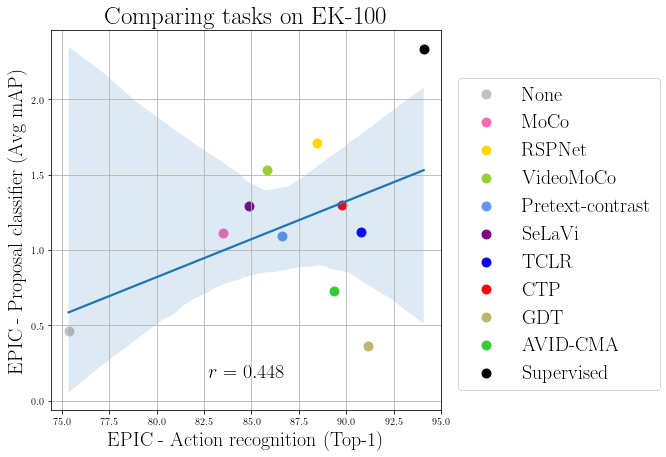

In [18]:
scatter_with_correlation(
    xvalues=df["EPIC - Action recognition (Top-1)"].values,
    yvalues=df["EPIC - Proposal classifier (Avg mAP)"].values,
    labels=df.index,
    legend=True,
    title="Comparing tasks on EK-100",
    xlabel="EPIC - Action recognition (Top-1)",
    ylabel="EPIC - Proposal classifier (Avg mAP)",
    add_corr_to_title=False,
    add_corr_to_text=True,
)

In [23]:
rank_corr = np.round(df.corr("spearman").iloc[0, 1], decimals=3)